In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA

In [3]:
customers_df = pd.read_csv("Customers.csv")
transactions_df = pd.read_csv("Transactions.csv")

In [4]:
customers_df["SignupDate"] = pd.to_datetime(customers_df["SignupDate"])
transactions_df["TransactionDate"] = pd.to_datetime(transactions_df["TransactionDate"])

In [5]:
merged_df = transactions_df.merge(customers_df, on="CustomerID")

In [6]:
customer_features = merged_df.groupby("CustomerID").agg({
    "TotalValue": "sum",  # Total spending
    "Quantity": "sum",  # Total number of products bought
}).reset_index()


In [7]:
scaler = StandardScaler()
customer_features_scaled = scaler.fit_transform(customer_features.drop(columns=["CustomerID"]))


In [8]:
wcss = []
for i in range(2, 11):  # Trying between 2 and 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(customer_features_scaled)
    wcss.append(kmeans.inertia_)


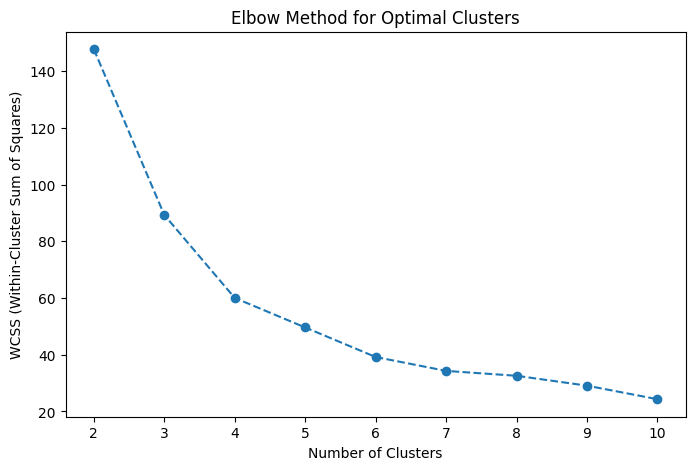

In [9]:
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

In [10]:
optimal_clusters = 4

In [11]:
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_features["Cluster"] = kmeans.fit_predict(customer_features_scaled)


In [12]:
db_index = davies_bouldin_score(customer_features_scaled, customer_features["Cluster"])
silhouette_avg = silhouette_score(customer_features_scaled, customer_features["Cluster"])
print(f"Davies-Bouldin Index: {db_index:.3f} (Lower is better)")
print(f"Silhouette Score: {silhouette_avg:.3f} (Higher is better)")


Davies-Bouldin Index: 0.721 (Lower is better)
Silhouette Score: 0.450 (Higher is better)


In [13]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(customer_features_scaled)
customer_features["PCA1"] = pca_features[:, 0]
customer_features["PCA2"] = pca_features[:, 1]


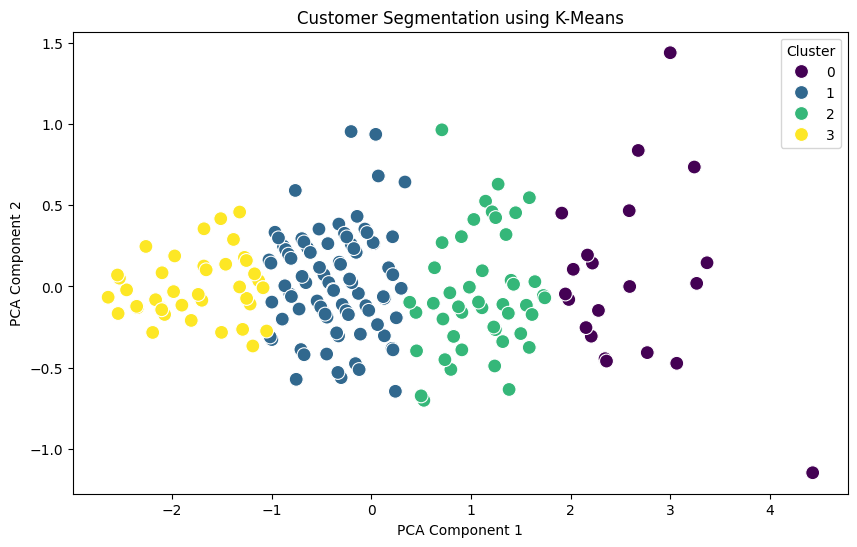

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=customer_features["PCA1"], y=customer_features["PCA2"], hue=customer_features["Cluster"], palette="viridis", s=100)
plt.title("Customer Segmentation using K-Means")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()


In [15]:
customer_features.to_csv("Customer_Segmentation.csv", index=False)

# Display first few results
print(customer_features.head())


  CustomerID  TotalValue  Quantity  Cluster      PCA1      PCA2
0      C0001     3354.52        12        1 -0.129920 -0.042661
1      C0002     1862.74        10        1 -0.937442  0.303874
2      C0003     2725.38        14        1 -0.142781  0.431188
3      C0004     5354.88        23        0  1.911546  0.451304
4      C0005     2034.24         7        3 -1.216846 -0.108203
